# Building a Handwritten Digits Classifier

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Initial Data exploration

In [2]:
## Dataset is loaded from sklearn.datasets
from sklearn.datasets import load_digits
image_data = load_digits()
image_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
## Create a variable which will transform the numpy array 'images' 
## into a Pandas Dataframe using the 'feature_names' as column names
images = pd.DataFrame(image_data['data'],columns = image_data['feature_names'])

## Add the target column to the end of the Dataframe
images = pd.concat([images,pd.DataFrame(image_data['target'])],axis=1)
images = images.rename(columns={images.columns[-1]:'target_number'})
images

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target_number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Visualizing our first digit

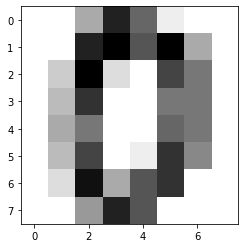

In [4]:
## First row in dataframe
first_image = images.iloc[0].drop('target_number')
np_image = first_image.values.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')
plt.show()

Visually we can see that this digit resembles closest to 0, which we can verify since our target column says it is 0.

#### Some more visualizations
Let's view some more numbers to get a feel of the dataset

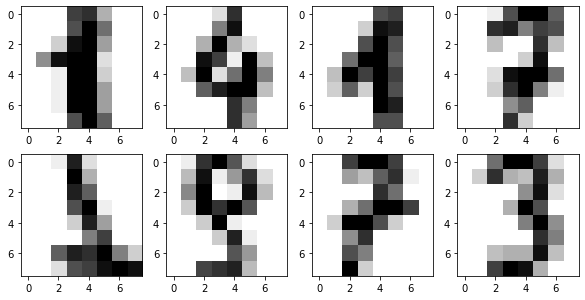

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(2,4,1)
plt.imshow(images.iloc[1].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,2)
plt.imshow(images.iloc[100].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,3)
plt.imshow(images.iloc[200].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,4)
plt.imshow(images.iloc[300].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,5)
plt.imshow(images.iloc[1000].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,6)
plt.imshow(images.iloc[1100].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,7)
plt.imshow(images.iloc[1200].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.subplot(2,4,8)
plt.imshow(images.iloc[1300].drop('target_number').values.reshape(8,8),cmap='gray_r')

plt.show()

## K-Nearest Neighbour Cross Validation

In [6]:
## Randomize Images Dataset
images = images.sample(frac=1, random_state=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

## Create a function which performs K-fold cross validation and returns the average accuracy for knn model
def cross_validate_knn(df, features, k, n):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    
    model = KNeighborsClassifier(n_neighbors=n)
    accuracy = cross_val_score(model,df[features],df['target_number'],scoring='accuracy',cv=kf)
    
    return np.mean(accuracy)

In [8]:
## Features are every column except target_number
features = list(images.columns)
del features[-1]

In [9]:
from mpl_toolkits import mplot3d

## Check accuracy score with different k and n values up until at least 20
kvals = []
nvals = []
cross_val_acc = []

for k in range(2,21):
    for n in range(1,21):
        kvals.append(k)
        nvals.append(n)
        cross_val_acc.append(cross_validate_knn(images, features, k, n))

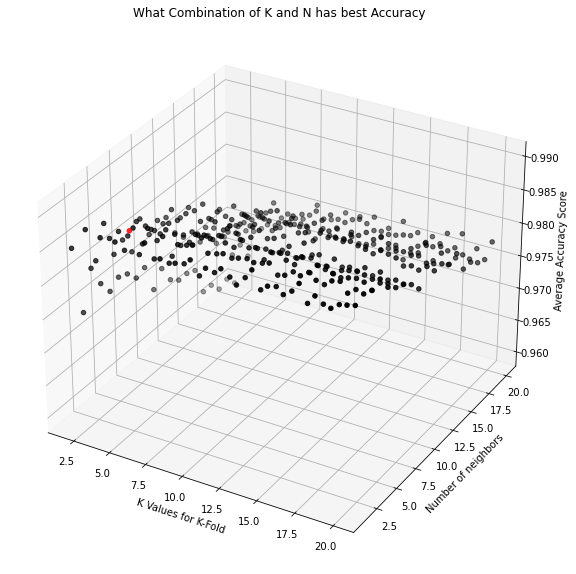

In [10]:
max_cross_val = max(cross_val_acc)

## Create 3D plot to find the relation of these three values
fig = plt.figure(figsize=(17,10))
ax = plt.axes(projection='3d')
colour = ['r' if value == max_cross_val else 'black' for value in cross_val_acc]
ax.scatter3D(kvals,nvals,cross_val_acc,c=colour)

ax.set_xlabel('K Values for K-Fold')
ax.set_ylabel('Number of neighbors')
ax.set_zlabel('Average Accuracy Score')
ax.set_title('What Combination of K and N has best Accuracy')

plt.show()

In [11]:
best_values = dict()
best_values['n_val'] = nvals[cross_val_acc.index(max(cross_val_acc))]
best_values['k_val'] = kvals[cross_val_acc.index(max(cross_val_acc))]
best_values['accuracy_score'] = cross_val_acc[cross_val_acc.index(max(cross_val_acc))]

best_values

{'n_val': 1, 'k_val': 6, 'accuracy_score': 0.9899851356373097}

As we can see, when using K-Nearest Neighbours our analysis tells us that having 1 neighbour, paired with 6-fold cross validation yields an accuracy score of around 99%. This being limited to K being in the range 2-20 and N being in the range 1-20. 

## Neural Network

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
## Create a function which performs K-fold cross validation and returns the average accuracy for neural network model
## This function can test the accuracy of 1, 2, or 3 hidden layers
## Note that each of the hidden layers will have the same amount of neurons
def cross_validate_nn(df, features, k, activation_type, neurons, hidden_layers=1):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    if hidden_layers==1:   
        model = MLPClassifier(hidden_layer_sizes=(neurons,),activation=activation_type)
    elif hidden_layers==2:
        model = MLPClassifier(hidden_layer_sizes=(neurons,neurons),activation=activation_type)
    elif hidden_layers==3:
        model = MLPClassifier(hidden_layer_sizes=(neurons,neurons,neurons),activation=activation_type)

    accuracy = cross_val_score(model,df[features],df['target_number'],scoring='accuracy',cv=kf)
    
    return np.mean(accuracy)

In [14]:
import warnings
warnings.filterwarnings('ignore')

Here are the parameters we will use and check the accuracies for them:

One Hidden Layer with:
- 8 Neurons
- 32 Neurons
- 128 Neurons

Two Hidden Layers with:
- 8 Neurons in each Layer
- 32 Neurons in each Layer
- 128 Neurons in each Layer

Three Hidden Layers with:
- 8 Neurons in each Layer
- 32 Neurons in each Layer
- 128 Neurons in each Layer

We will also test all of these with different activation functions.

In [15]:
## Store each k value, number of neurons, activation function, number of hidden layers, and accuracy score in lists
## We can use this for graphing and calculating which values yield the largest accuracy
kfold_l = []
neurons_l = []
activation_functions_l = []
hidden_layers_l = []
accuracy_score_l = []

for k in range(2,11):
    for n in [8,32,128]:
        for a in ['identity','logistic','tanh','relu']:
            for h in [1,2,3]:
                kfold_l.append(k)
                neurons_l.append(n)
                activation_functions_l.append(a)
                hidden_layers_l.append(h)
                accuracy_score_l.append(cross_validate_nn(images, features, k, a, n, h))

#### Graphing accuracies

X-Axis: K-fold

Y-Axis: Number of Neurons

Z-Axis: Accuracies

In [16]:
## Store results in a dataframes
neuron_network_results = pd.DataFrame({'KFold':kfold_l,
                                      'Number of Neurons':neurons_l,
                                      'Hidden Layers':hidden_layers_l,
                                      'Activation Function':activation_functions_l,
                                      'Accuracy Score':accuracy_score_l})

HL1 = neuron_network_results[neuron_network_results['Hidden Layers']==1]
HL2 = neuron_network_results[neuron_network_results['Hidden Layers']==2]
HL3 = neuron_network_results[neuron_network_results['Hidden Layers']==3]

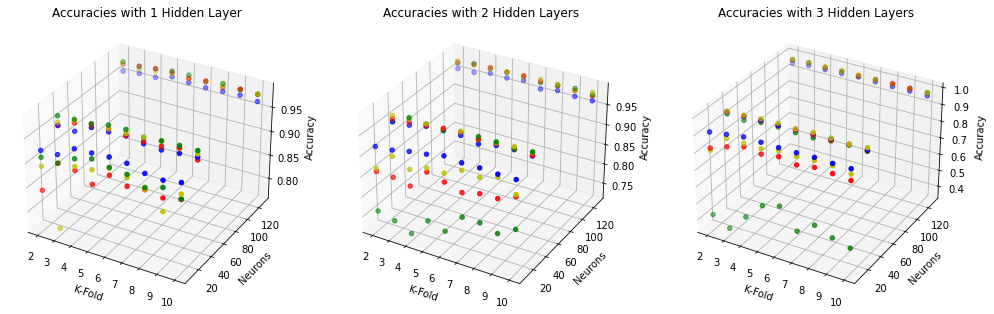

In [17]:
fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(131, projection='3d')
colour = ['b' if value == 'identity' else 'g' if value=='logistic' else 'r' if value=='tanh' else 'y'for value in HL1['Activation Function']]
ax1.scatter3D(HL1['KFold'],HL1['Number of Neurons'],HL1['Accuracy Score'],c=colour)
ax1.set_title('Accuracies with 1 Hidden Layer')
ax1.set_xlabel('K-Fold')
ax1.set_ylabel('Neurons')
ax1.set_zlabel('Accuracy')

ax2 = fig.add_subplot(132, projection='3d')
colour = ['b' if value == 'identity' else 'g' if value=='logistic' else 'r' if value=='tanh' else 'y'for value in HL2['Activation Function']]
ax2.scatter3D(HL2['KFold'],HL2['Number of Neurons'],HL2['Accuracy Score'],c=colour)
ax2.set_title('Accuracies with 2 Hidden Layers')
ax2.set_xlabel('K-Fold')
ax2.set_ylabel('Neurons')
ax2.set_zlabel('Accuracy')

ax3 = fig.add_subplot(133, projection='3d')
colour = ['b' if value == 'identity' else 'g' if value=='logistic' else 'r' if value=='tanh' else 'y'for value in HL3['Activation Function']]
ax3.scatter3D(HL3['KFold'],HL3['Number of Neurons'],HL3['Accuracy Score'],c=colour)
ax3.set_title('Accuracies with 3 Hidden Layers')
ax3.set_xlabel('K-Fold')
ax3.set_ylabel('Neurons')
ax3.set_zlabel('Accuracy')

plt.show()

One significant feature we can notice is that with 2 or 3 hidden layers, a lower neurons mixed with a logistic function in the neural network yields lower accuracies.

#### Row with Maximum Accuracy with 1 Hidden Layer

In [18]:
HL1[HL1['Accuracy Score'] == HL1['Accuracy Score'].max()]

,KFold,Number of Neurons,Hidden Layers,Activation Function,Accuracy Score
243,8,128,1,logistic,0.983862


#### Row with Maximum Accuracy with 2 Hidden Layers

In [19]:
HL2[HL2['Accuracy Score'] == HL2['Accuracy Score'].max()]

,KFold,Number of Neurons,Hidden Layers,Activation Function,Accuracy Score
322,10,128,2,relu,0.983867


#### Row with Maximum Accuracy with 3 Hidden Layers

In [20]:
HL3[HL3['Accuracy Score'] == HL3['Accuracy Score'].max()]

,KFold,Number of Neurons,Hidden Layers,Activation Function,Accuracy Score
248,8,128,3,tanh,0.981079


## Possible Best Model
As we can see, our best neural network model given our chosen parameters are 10-fold, 128 neurons, 2 hidden layers, relu function which yields an accuracy score of around 0.984. Even with these parameters, a 6-fold K-Nearest Neighbours model with 1 neighbour has the highest accuracy with a score of around 0.99.

In [21]:
train = images[:1497]
test = images[1497:]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train[features],train['target_number'])

KNeighborsClassifier(n_neighbors=1)

In [22]:
predictions = knn.predict(test[features])

#### Dataframe storing the Actual Number and Prediction Values from our model

In [23]:
accuracy_df = pd.DataFrame({'Number':test['target_number'],'Prediction':predictions})
accuracy_df['Correct'] = (accuracy_df['Number']==accuracy_df['Prediction']).astype(int)
accuracy_df.head()

,Number,Prediction,Correct
1366,0,0,1
1280,8,8,1
182,7,7,1
617,0,0,1
1324,9,9,1


In [24]:
accuracy_df['Correct'].value_counts()

1    296
0      4
Name: Correct, dtype: int64

As we can see, our model predicted 296 numbers out of 300 correct in our test set.

#### What numbers are wrong?

In [25]:
accuracy_df[accuracy_df['Correct'] == 0]

,Number,Prediction,Correct
1553,8,1,0
1571,8,1,0
170,8,1,0
129,8,1,0


As we can see, our model has a harder time predicting the number 8, where it may mistake it for a 1.

#### How many 8's are there in the Test Set?

In [26]:
len(accuracy_df[accuracy_df['Number'] == 8])

34

There are 34 number 8's in our test set, meaning that our model predicted the number 8 wrong 4/34 times or about 11.7% of the number 8 predictions were wrong. This is a small enough value to which we don't have to worry about anything.

## Testing on own data
We should also see the accuracy of the model on digits which I have written myself. If it performs poorly, we can try out the best neural network model.

In [31]:
import cv2
## Function which takes a image as input, resizes to 8x8, grayscales, and into a 1D array
def img_transform(img_path):
    ## Grayscaling
    img_path = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ## Invert bitmaps to increase contrast between pixels
    img_path = cv2.bitwise_not(img_path)
    ## resize to 8x8
    img_path = cv2.resize(img_path,(8,8))
    ## Flatten into 1D array
    img_path = img_path.flatten().reshape(1,-1)
    return img_path

I have handwritten some numbers on paint.net which we will use to verify if our model works. First let's view all the numbers

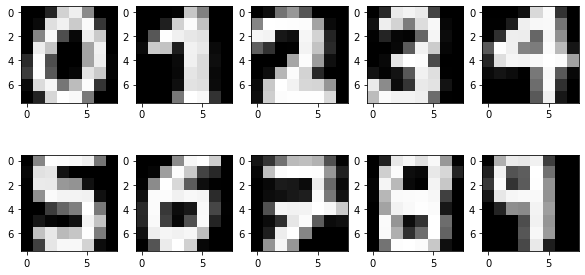

In [32]:
pngs = ['zero.png','one.png','two.png','three.png','four.png','five.png','six.png','seven.png','eight.png','nine.png']
numbers = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10, 5))
for png,number in zip(pngs,numbers):
    plt.subplot(2,5,number)
    plt.imshow(pd.Series(img_transform(png)[0]).values.reshape(8,8), cmap='gray')
plt.show()

In [33]:
## Check if our KNN model works with my hand-writing
for png in pngs:
    print(knn.predict(img_transform(png)))

[0]
[1]
[2]
[3]
[1]
[5]
[5]
[7]
[8]
[1]


Our KNN model predicts the handwritten numbers 7/10 times, which from what we have seen, is lower than the accuracy score found on the test set. Let's see how our best neural network model classifies these numbers.

## Neural Network Model
We will use the model with the highest accuracy that we have tested. 128 neurons, 2 hidden layers and relu function.

In [101]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(128,128),activation='relu')
nn_classifier.fit(train[features],train['target_number'])

MLPClassifier(hidden_layer_sizes=(128, 128))

In [103]:
predictions_nn = nn_classifier.predict(test[features])

#### Dataframe storing the Actual Number and Prediction Values from our model

In [104]:
accuracy_df_nn = pd.DataFrame({'Number':test['target_number'],'Prediction':predictions_nn})
accuracy_df_nn['Correct'] = (accuracy_df_nn['Number']==accuracy_df_nn['Prediction']).astype(int)
accuracy_df_nn.head()

,Number,Prediction,Correct
1366,0,0,1
1280,8,8,1
182,7,7,1
617,0,0,1
1324,9,9,1


In [105]:
accuracy_df_nn['Correct'].value_counts()

1    291
0      9
Name: Correct, dtype: int64

#### What numbers are wrong?

In [106]:
accuracy_df_nn[accuracy_df_nn['Correct'] == 0]

,Number,Prediction,Correct
1553,8,1,0
1571,8,9,0
1581,8,4,0
1729,3,5,0
77,2,1,0
792,6,0,0
1095,4,9,0
129,8,1,0
905,8,1,0


Unlike the KNN model, there is no proper pattern we see in what numbers are inaccurate. However, in both of the models the number 8 is harder to classify.

## Testing on own data

In [107]:
for png in pngs:
    print(nn_classifier.predict(img_transform(png)))

[0]
[1]
[2]
[3]
[4]
[5]
[5]
[7]
[8]
[9]


Very surprisingly, our neural network model performed better than our KNN model on personal data, scoring 9/10 numbers accurately.

## Choosing Best model
Our KNN model had a higher test accuracy score, but got a 2 points lower score when using our own data comparing to the NN model. The neural network also seems more consistent in the predictions since it mixed up 6 with 5, which is understandable since 5 and 6 have a slightly similar shape. The KNN model however got 9 mixed up with 1 which is a bigger flaw.

For these reasons, the neural network model will be picked.

## Saving model

In [110]:
import joblib
joblib.dump(nn_classifier,'digit_classifier.pkl')

['digit_classifier.pkl']

## Conclusion
We have found out the best machine learning algorithm to identify a handwritten digit. At first we though that it was a KNN model due to the higher test accuracy scores, but upon further investigation on our own custom data, a neural network with two hidden layers, 128 neurons each, and a relu function outperformed the KNN model.

Some Limitations and future improvements:
- Do not limit images to only 8x8 pixels
- Possible colour recognition
- Have the ability to recognize larger numbers (e.g; 10, 11, 129)
- Have the ability to recognize letters
- Have the ability to recognize sentences which combine letters and numbers